In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
patients_path = 'Downloads/patients.csv'
visits_path = 'Downloads/visits.csv'

patients = pd.read_csv(patients_path, header=0, names=["id","year","height","smoker","illnesses"])
visits = pd.read_csv(visits_path, header=0, names=['id', 'when', 'clinic', 'weight', 'heartrate'], parse_dates=['when'])

In [51]:
def inspect(patient_df : pd.DataFrame) -> pd.DataFrame:
    "given a patient dataframe, returns any problematic rows"
    height_mask = (patient_df['height'] > 78) | (patient_df['height'] < 36)
    smoker_mask = patient_df['smoker'].isnull()
    
    suspicious_rows = patient_df[height_mask | smoker_mask]
    
    return suspicious_rows


def prep_data(patient_df: pd.DataFrame) -> None:
    '''given a patient dataframe updates, sanitizes and standardizes the smoker 
    column to be booleans, and the illness column to be a list of illnesses.
    '''
    #sanitize NaN to strings so we can produce empty list upon str.split(;)
    null_mask = patient_df['illnesses'].isnull()
    patient_df.loc[null_mask, 'illnesses'] = ''
    
    patient_df['illnesses'] = patient_df['illnesses'].str.split(';')
    
    #defining masks for smokers and non-smokers
    smoke_mask = patient_df['smoker'] == 'yes'
    no_smoke_mask = patient_df['smoker'] == 'no'
    
    #changing yes to True and no to False
    patient_df.loc[smoke_mask, 'smoker'] = True
    patient_df.loc[no_smoke_mask, 'smoker'] = False

def record_illness(patient_df: pd.DataFrame, patient_id: int, illness: str):
    'records a new illness for an existing patient in the dataframe'
    filtered_patient_df = patient_df[patient_df['id'] == patient_id]
    if not filtered_patient_df.empty:
        index = filtered_patient_df.index[0]
        patient_df.loc[index, 'illnesses'].append(illness)

def new_visit(visits_df: pd.DataFrame, patient_id: int, when: pd.Timestamp, clinic: str, weight: int, heartrate: int):
    'records a new visit by adding a row to the existing visits dataframe'
    new_row = [patient_id, when, clinic, weight, heartrate]
    visits_df = visits_df.append(pd.DataFrame([new_row], columns=visits_df.columns), ignore_index=True)
    return visits_df

#Analysis

def plot_weight_heart_data(dataframe: pd.DataFrame):
    'produces a scatterplot comparing patient data on their weight and heart'
    column_names = dataframe.columns.to_list()
    if ('heartrate' in column_names) and ('weight' in column_names):
        dataframe.plot.scatter(x = 'heartrate', y = 'weight', title = 'Heartrate versus Weight in Patients')
        plt.show()
    else:
        raise ValueError('column names do not exist')    

def plot_visits_per_month(visits_df: pd.DataFrame):
    'produces a line plot that shows the number of patient visits per month'
    visits_df['month'] = visits_df['when'].dt.month
    count_by_month = visits_df.groupby('month')['month'].count()
    count_by_month.plot.line(x = 'Month', y = 'Number of Visits', title = 'Number of Patient Visits per Month')
    plt.show()

def visits_per_clinic(visits_df: pd.DataFrame):
    'produces three line plots, one for each clinic for visits over time'
    
    #create three separate dataframes containing data from each clinic
    beaumont_df = visits_df[visits_df['clinic'] == 'Beaumont']
    oakdale_df = visits_df[visits_df['clinic'] == 'Oakdale']
    healthbridge_df = visits_df[visits_df['clinic'] == 'Healthbridge']
    
    plot_visits_per_month(beaumont_df)
    plot_visits_per_month(oakdale_df)
    plot_visits_per_month(healthbridge_df)
    
    plt.title('Patient Visits for each Clinic')
    plt.show()

In [52]:
# Prepare the data using prep_data and identifying the suspiscious rows
prep_data(patients)
suspicious_rows = inspect(patients)
print(suspicious_rows)

      id  year  height smoker illnesses
16    18  1996      84   True        []
23    25  1949      67    NaN        []
61    63  1992      28  False        []
81    83  1965      60    NaN        []
90    92  1930      63    NaN        []
116  118  1999      67    NaN        []
158  160  1956      69    NaN        []
207  209  1951      59    NaN        []
214  216  1943      63    NaN        []


In [53]:
#run these functions below to see the plots

#plot_weight_heart_data(visits)
#plot_visits_per_month(visits)
#visits_per_clinic(visits)

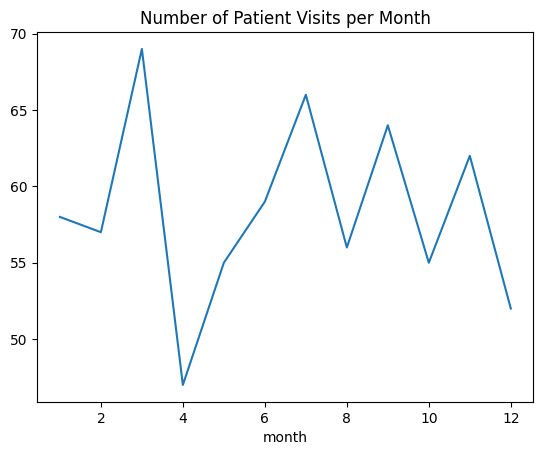

In [54]:
plot_visits_per_month(visits)
# visits_per_clinic_interactive( )